# Proyek Klasifikasi Gambar: Car-Bike Dataset
- **Nama:** Muhammad Fatarsyah Hardeva
- **Email:** hardevafatarsyah@gmail.com
- **ID Dicoding:** fatarsyah_26

## Import Semua Packages/Library yang Digunakan

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import zipfile


### Data Loading

In [2]:
from google.colab import files

uploaded = files.upload()

zip_path = "car-bike.zip"
extract_path = "/content/car-bike"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Ekstraksi selesai. Folder dataset ada di:", extract_path)


Saving car-bike.zip to car-bike.zip
Ekstraksi selesai. Folder dataset ada di: /content/car-bike


In [8]:
# membuat nama directori
base_dir = '/content/car-bike/Car-Bike-Dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [9]:
car_dir = os.path.join(base_dir,'Car')
bike_dir = os.path.join(base_dir, 'Bike')

#### Split Dataset

In [10]:
train_car_dir, val_car_dir = train_test_split(os.listdir(car_dir), test_size = 0.2)

train_bike_dir, val_bike_dir = train_test_split(os.listdir(bike_dir), test_size = 0.2)


In [11]:
train_car = os.path.join(train_dir, 'Car')
train_bike = os.path.join(train_dir, 'Bike')
val_car = os.path.join(validation_dir, 'Car')
val_bike = os.path.join(validation_dir, 'Bike')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_car):
  os.mkdir(train_car)
if not os.path.exists(train_bike):
  os.mkdir(train_bike)

if not os.path.exists(val_car):
  os.mkdir(val_car)
if not os.path.exists(val_bike):
  os.mkdir(val_bike)

In [12]:
import shutil

for i in train_car_dir:
  shutil.copy(os.path.join(car_dir, i), os.path.join(train_car, i))
for i in train_bike_dir:
  shutil.copy(os.path.join(bike_dir,i), os.path.join(train_bike,i))

for i in val_car_dir:
  shutil.copy(os.path.join(car_dir, i), os.path.join(val_car,i))
for i in val_bike_dir:
  shutil.copy(os.path.join(bike_dir,i), os.path.join(val_bike,i))

In [15]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'sparse'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Modelling

In [23]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(2, activation= 'softmax')
])

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,812,482 (25.99 MB)

 Trainable params: 6,812,482 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 - 14s - 580ms/step - accuracy: 0.5038 - loss: 0.7425 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/20
25/25 - 9s - 365ms/step - accuracy: 0.5150 - loss: 0.6939 - val_accuracy: 0.5375 - val_loss: 0.6884
Epoch 3/20
25/25 - 11s - 421ms/step - accuracy: 0.6037 - loss: 0.6786 - val_accuracy: 0.6562 - val_loss: 0.5896
Epoch 4/20
25/25 - 5s - 186ms/step - accuracy: 0.7763 - loss: 0.4682 - val_accuracy: 0.8062 - val_loss: 0.4426
Epoch 5/20
25/25 - 21s - 832ms/step - accuracy: 0.8263 - loss: 0.4066 - val_accuracy: 0.9062 - val_loss: 0.3185
Epoch 6/20
25/25 - 7s - 261ms/step - accuracy: 0.8625 - loss: 0.3289 - val_accuracy: 0.8687 - val_loss: 0.2916
Epoch 7/20
25/25 - 10s - 385ms/step - accuracy: 0.8963 - loss: 0.2638 - val_accuracy: 0.9000 - val_loss: 0.2283
Epoch 8/20
25/25 - 5s - 201ms/step - accuracy: 0.8813 - loss: 0.2906 - val_accuracy: 0.8687 - val_loss: 0.2688
Epoch 9/20
25/25 - 7s - 265ms/step - accuracy: 0.9013 - loss: 0.2633 - val_accuracy: 0.8375 - val_loss: 0.3863
Epoch 10

## Evaluasi dan Visualisasi

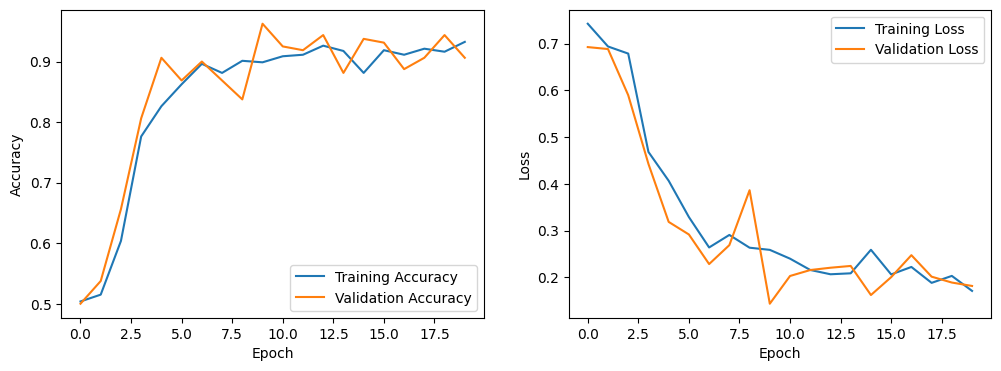

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Konversi Model

In [36]:
model.save("/content/myModel.keras")
tf.saved_model.save(model, "saved_model_tf")

converter = tf.lite.TFLiteConverter.from_saved_model("saved_model_tf")
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

# Simpan ke TFJS
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "tfjs_model")


shutil.make_archive("saved_model_tf", 'zip', "saved_model_tf")
files.download("saved_model_tf.zip")
shutil.make_archive("tfjs_model", 'zip', "tfjs_model")
files.download("tfjs_model.zip")



failed to lookup keras version from the file,
    this is likely a weight only file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Car (1).jpeg to Car (1) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Car (1) (1).jpeg
Car


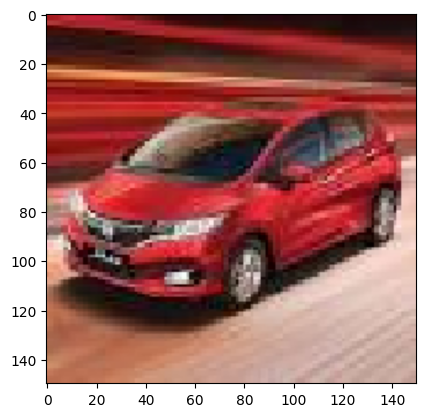

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Bike')
  else:
    print('Car')